## Unsupervised Learning Capstone

- **1. Go out and find a dataset of interest.** It could be one that helps you work on one of Thinkful's recommended research questions, or it could be any other dataset that addresses an unsupervised learning question of your own.
- **2. Explore the data.** Get to know the data. Spend a lot of time going over its quirks. You should understand how it was gathered, what's in it, and what the variables look like.
- **3. Try several different approaches.** Really work to tune a variety of models before choosing what you consider to be the best performer.

**Keep the following considerations in mind: How do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other? This will ultimately include the following deliverables:**

- **1.Conduct the analysis in Jupyter.** Provide a complete research report, using the research presentation framework introduced in the Presenting research results checkpoint as a starting point. The report should use compelling visualizations and actionable insights to tell the story to your intended audience. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking. **A Jupyter Notebook that tells a compelling story about your data. You'll submit this Notebook at the end of this checkpoint.**


- **2.Slide Deck.** Rather than create a deck in a presentation tool like PowerPoint or Google Slides, use Jupyter's built-in slide deck capabilities. This cuts down on the time-consuming and error-prone process of copying and pasting into an external program. It will also make your presentation fully reproducible. **A 15-to-30-minute presentation of your findings. You'll need to produce a deck and present it to your peers.**

**On the day of your presentation, you'll give your presentation to your peers. Members of the audience will participate in asking you questions.**


## 1. Introduction to the Data

The dataset chosen for the current project is Credit Card Dataset from Kaggle.  This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

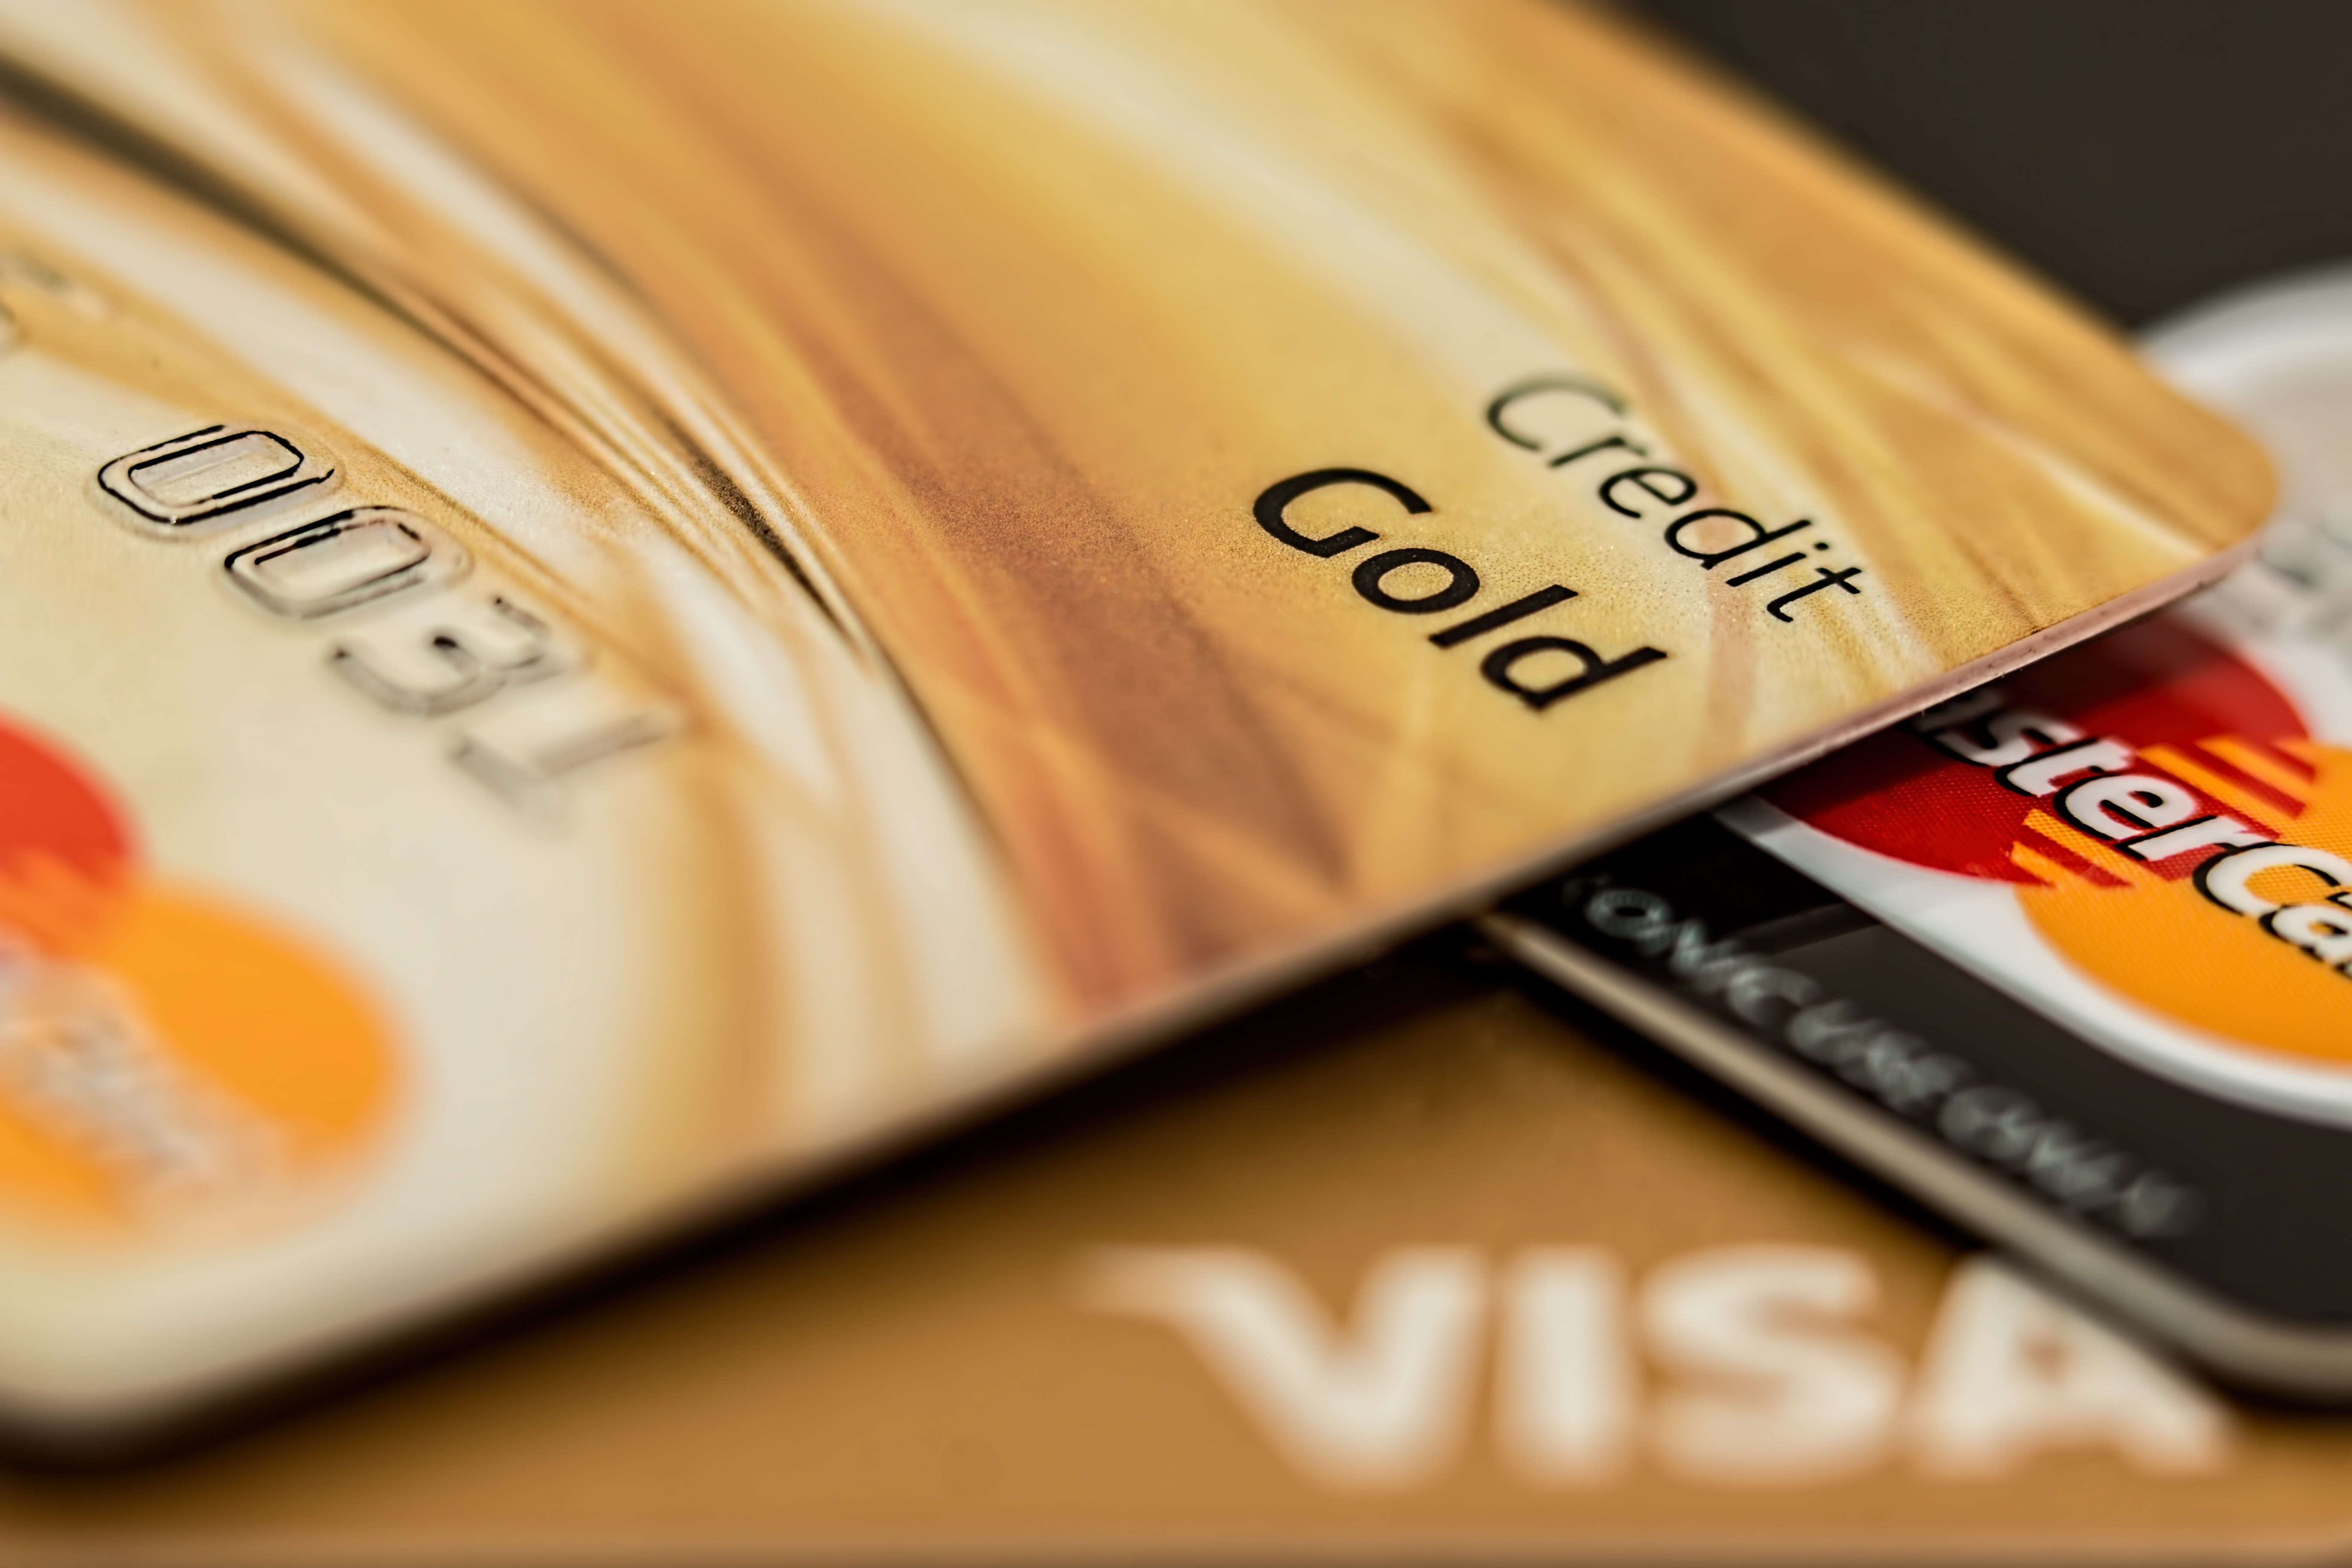

In [1]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "credit.jpg", width = 600, height = 300)

**Attribute List**

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

**The credit card data has 17 attributes for each customer as listed above.**

## 2. Importing Libraries and reading the data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
data= pd.read_csv("C:/Users/Lakshmi/Desktop/Study/Thinkful/Unsupervised/Capstone_3/CC_GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print(data.shape)

(8950, 18)


## 3.Basic EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Print the names of the columns
col_name = data.columns
print(col_name)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [9]:
# the number of unique values in the dataframe
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [10]:
data.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

## 4. Missing Values

In [11]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [13]:
data.isnull().sum().sort_values(ascending=False)

TENURE                              0
PRC_FULL_PAYMENT                    0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

In [14]:
raw_df = data.drop('CUST_ID', axis = 1) 

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## 5. Univariate Analysis

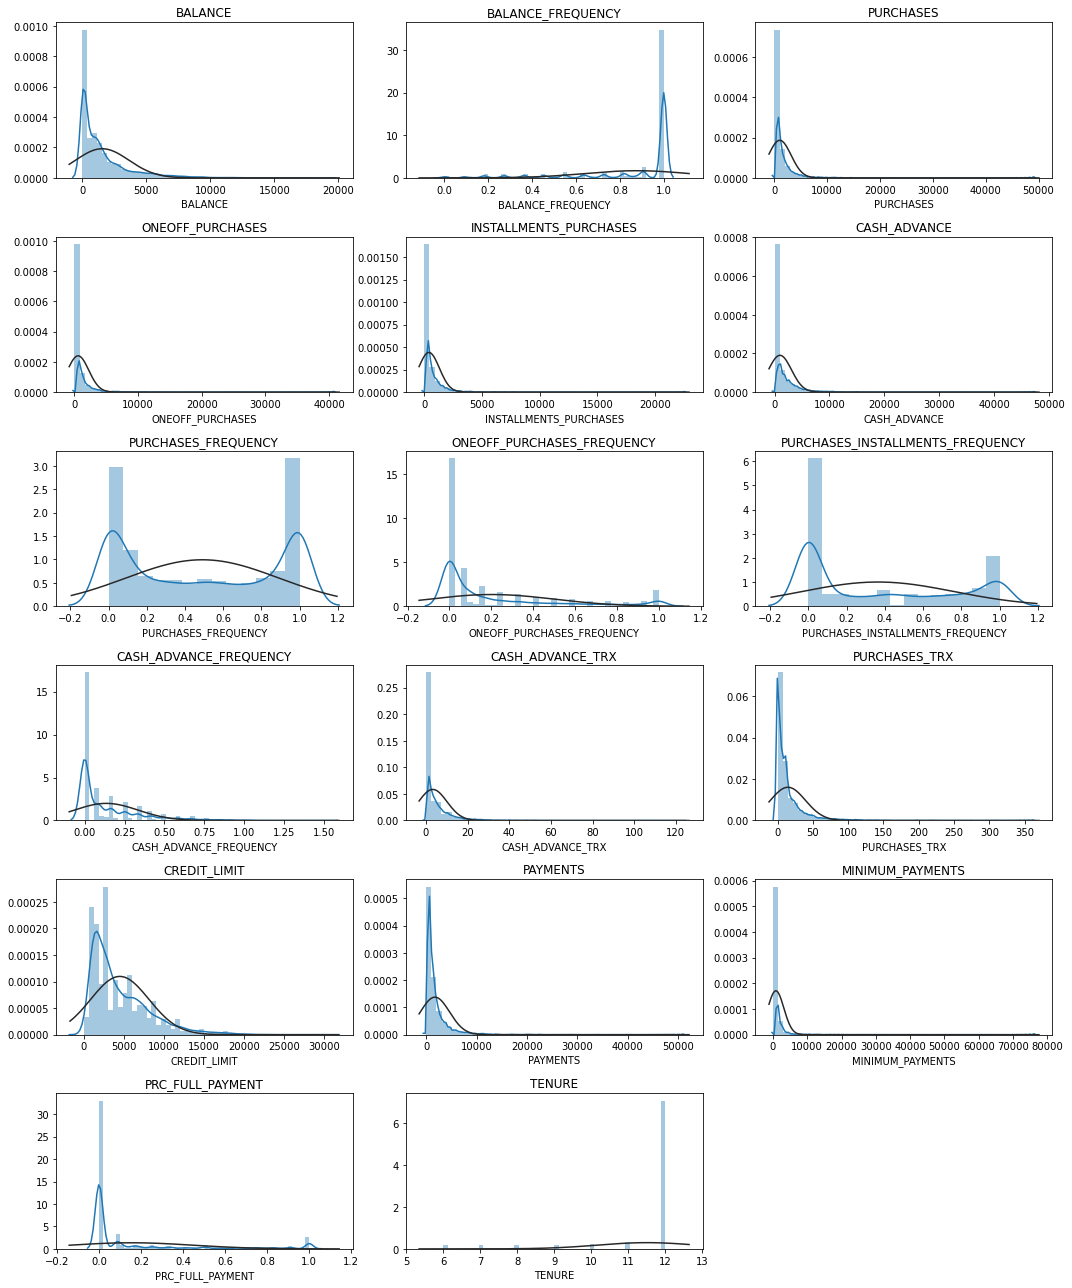

In [16]:
#A quick check on vriables

from scipy.stats import norm 

graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(data[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

- Most customers have 12 years **Tenure** 
- The average **Balance** is about 1600 but a balance of 0 is more common
- **Balance_Frequency** for most customers is updated frequently ~ 1
- Very small number of customers pay their balance in full **PRC_FULL_PAYMENT ~ 0**
- For **PURCHASES_FREQUENCY**, there are two distinct group of customers
- For **ONEOFF_PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENT_FREQUENCY** most users don't do one off puchases or installment purchases frequently

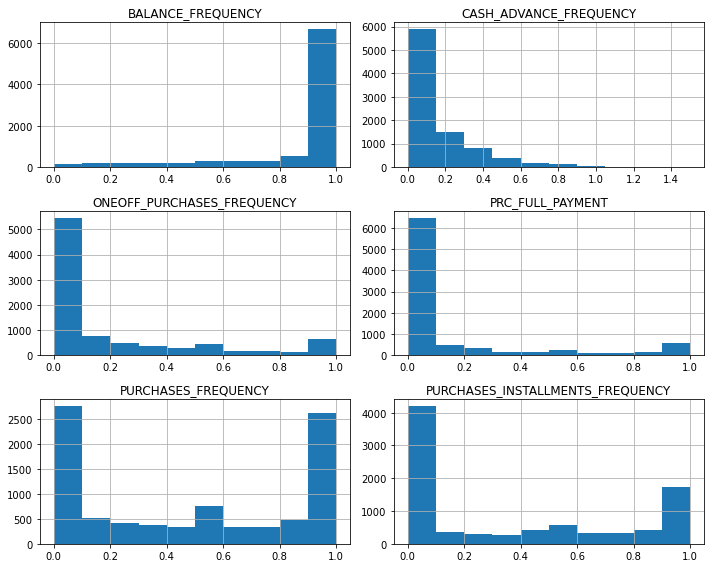

In [17]:
#Frequency variables in charts

data[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

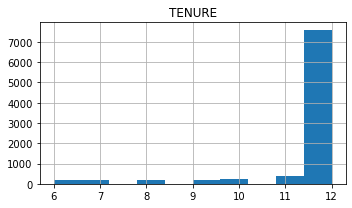

In [92]:
data[['TENURE']].hist(figsize=(5,3))

plt.tight_layout()

Text(0.5, 1.0, 'PURCHASES FREQUENCY')

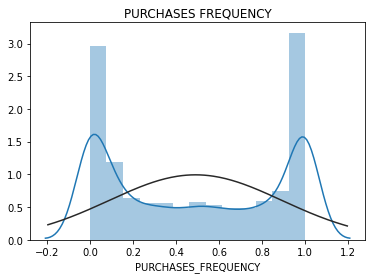

In [95]:

sns.distplot(data['PURCHASES_FREQUENCY'].dropna(),fit=norm)
plt.title('PURCHASES FREQUENCY')

Text(0.5, 1.0, 'BALANCE')

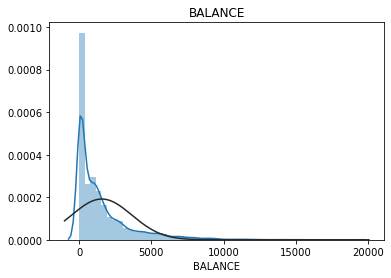

In [96]:
sns.distplot(data['BALANCE'].dropna(),fit=norm)
plt.title('BALANCE')

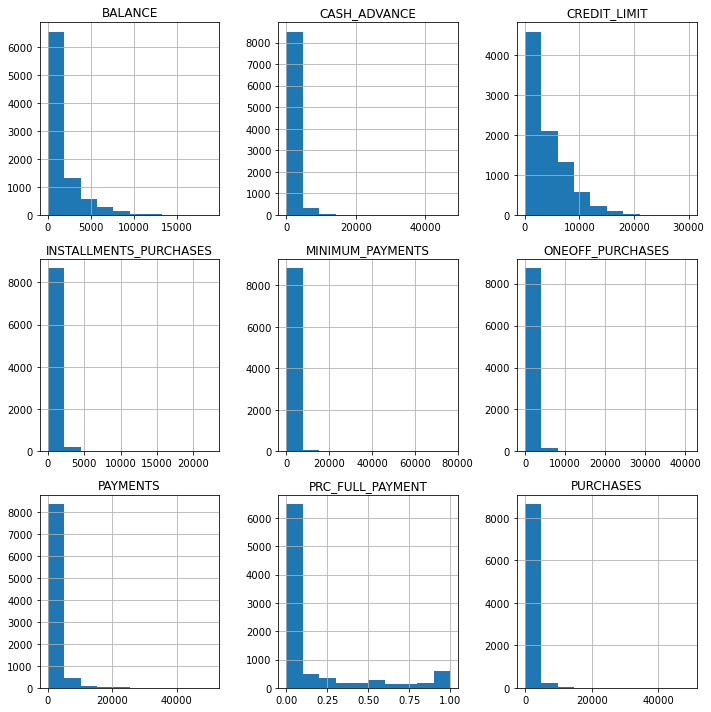

In [18]:
data[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

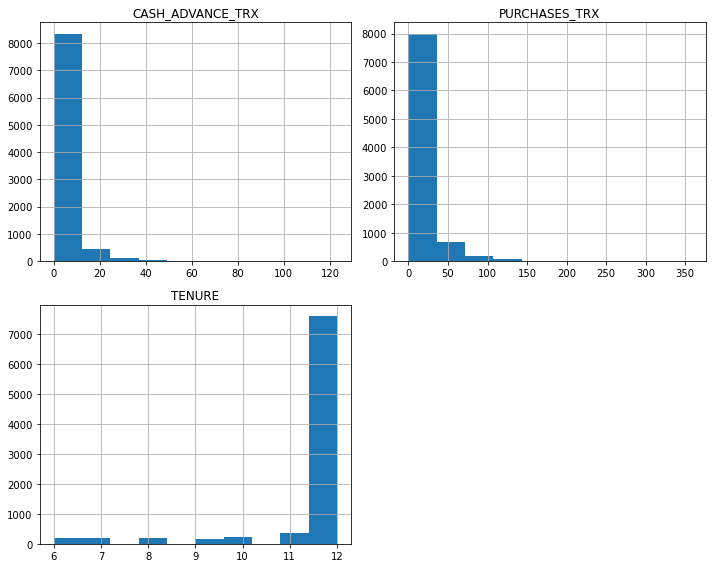

In [19]:
#int. values in histogram

data[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

## 6. Correlation Heat map

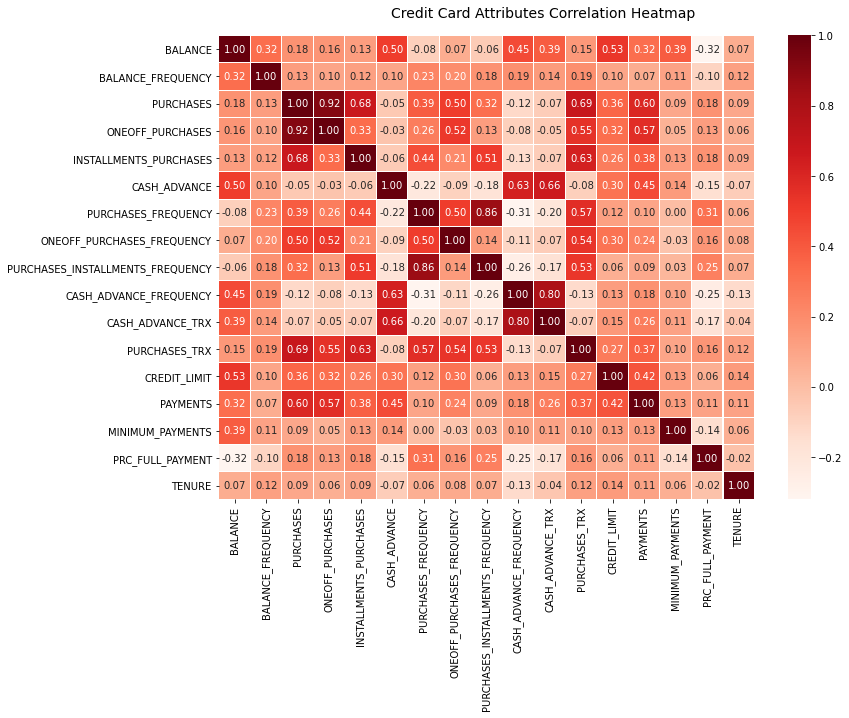

In [20]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(12, 8))
corr = raw_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Credit Card Attributes Correlation Heatmap', fontsize=14)

1. **Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit**
2. **Purchases has a higher level of correlation with One off Purchases, Purchases TRX, Installment Purchases and One Off purchases frequency**
3. **Payments variable has a high correletion with Purchases and one off Purchases and to some extent with Credit limit**
4. **Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables**

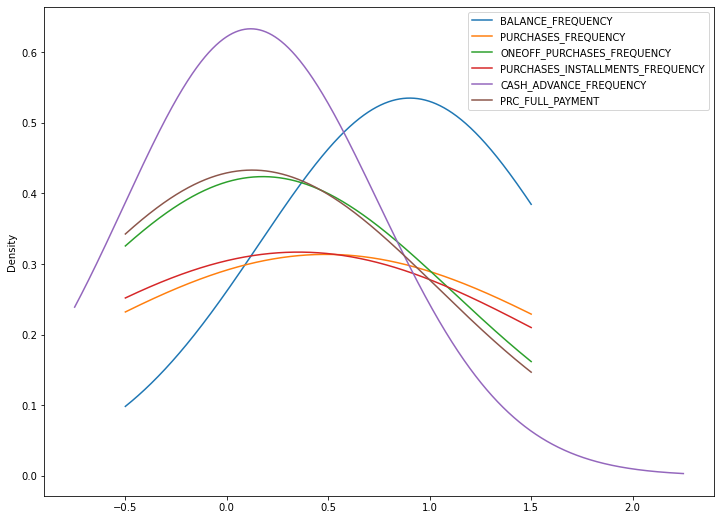

In [21]:
ax = data[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(12,9), bw_method=3) #,ind=[0, 2, 3,4]

## 7. Clustering Methods

## Experiment with various clustering models
- (A). KMeans
- (B). Agglomerative Hierarchical
- (C). DBSCAN
- (D). Gaussian Mixture

## (A). Clustering using K-Means

- 1.In this section, we will perform K-Means clustering on the standardized data

- 2.Check for the clustering metrics (inertia, silhouette scores)

- 3.Hyperparameter Tuning

- 4.Get a visualization with PCA for meaningful interpretation of results


## Standarize Data

In [22]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
data_imputed = pd.DataFrame(scaled_df, columns=raw_df.columns)

## Get Inertia Plot

In [23]:
# inertia plotter function

def inertia_plot(clust, X, start = 2, stop = 15):
    inertia = []
    for x in range(start,stop):
        k_means = clust(n_clusters = x, random_state=123)
        labels = k_means.fit_predict(X)
        inertia.append(k_means.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'x')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

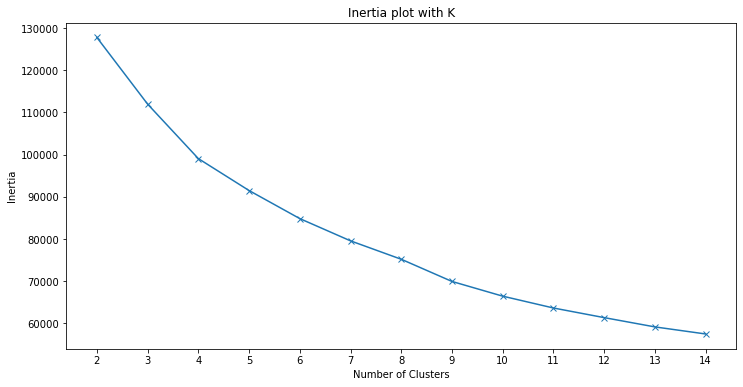

In [24]:
inertia_plot(KMeans, data_imputed)

 - **From the above elbow plot, we can say that a good pick for the number of clusters is about 4 or 8.**

## Get Silhouette Score

Silhouette-Score for 2 Clusters:  0.20985855736893663
Silhouette-Score for 3 Clusters:  0.25065507057446634
Silhouette-Score for 4 Clusters:  0.1976074492720698
Silhouette-Score for 5 Clusters:  0.19330806331776698
Silhouette-Score for 6 Clusters:  0.20267154621740047
Silhouette-Score for 7 Clusters:  0.20882553626093053
Silhouette-Score for 8 Clusters:  0.21331980409750423


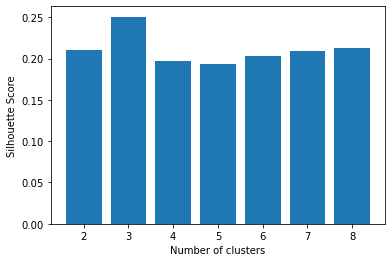

In [25]:
#Calculate all the sum of within-cluster variance for n_clusters from 2 to 8

#kmeans_clusters = []
ss = []
cost = []

#Calculate all the sum of within-cluster variance for n_clusters from 2 to 14

for i in range(2, 9):
    k_means = KMeans(n_clusters = i, random_state=123)
    #kmeans_clusters.append(k_means.fit_predict(data_imputed))
    label = k_means.fit_predict(data_imputed)
    cost.append(k_means.inertia_)
    ss.append(silhouette_score(data_imputed, k_means.labels_, metric='euclidean'))
    print('Silhouette-Score for', i,  'Clusters: ', silhouette_score(data_imputed, label))
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8] 
plt.bar(k, ss) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    
    


- **From Silhouette Score, we can say that 3-cluster solution is more suitable for the current dataset**

## Hyperparameter Tuning

In [26]:
k_means = KMeans(n_clusters = 3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(data_imputed)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(data_imputed, k_means.labels_, metric='euclidean')))
labels = k_means.labels_
clusters_scale = pd.concat([data_imputed, pd.DataFrame({'cluster-3':labels})], axis=1)

KMeans Scaled Silhouette Score: 0.2500496566968931


In [27]:
k_means = KMeans(n_clusters = 3, n_init=1000, max_iter=400, init='k-means++', random_state=42).fit(data_imputed)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(data_imputed, k_means.labels_, metric='euclidean')))
labels = k_means.labels_
clusters_scale = pd.concat([data_imputed, pd.DataFrame({'cluster-3':labels})], axis=1)

KMeans Scaled Silhouette Score: 0.2509232309808161


In [28]:
k_means = KMeans(n_clusters = 3, n_init=100, max_iter=400, init='random', random_state=42).fit(data_imputed)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(data_imputed, k_means.labels_, metric='euclidean')))
labels = k_means.labels_
clusters_scale = pd.concat([data_imputed, pd.DataFrame({'cluster-3':labels})], axis=1)

KMeans Scaled Silhouette Score: 0.24996085627555273


In [29]:
k_means = KMeans(n_clusters = 3, n_init=1000, max_iter=1000, init='random', random_state=42).fit(data_imputed)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(data_imputed, k_means.labels_, metric='euclidean')))
labels = k_means.labels_
clusters_scale = pd.concat([data_imputed, pd.DataFrame({'cluster-3':labels})], axis=1)

KMeans Scaled Silhouette Score: 0.25014574505695786


**The tuned hyperparameters for KMeans are**
- **n_clusters = 3**
- **n_init=1000**
- **max_iter=400**
- **init='k-means++'**

**The silhouette score Kmeans is 0.2509**

In [37]:
silhouette_scores_models = []
silhouette_scores_models.append(0.2509)
print(silhouette_scores_models)

[0.2509]


## Visualization with PCA

Text(0, 0.5, 'PC2')

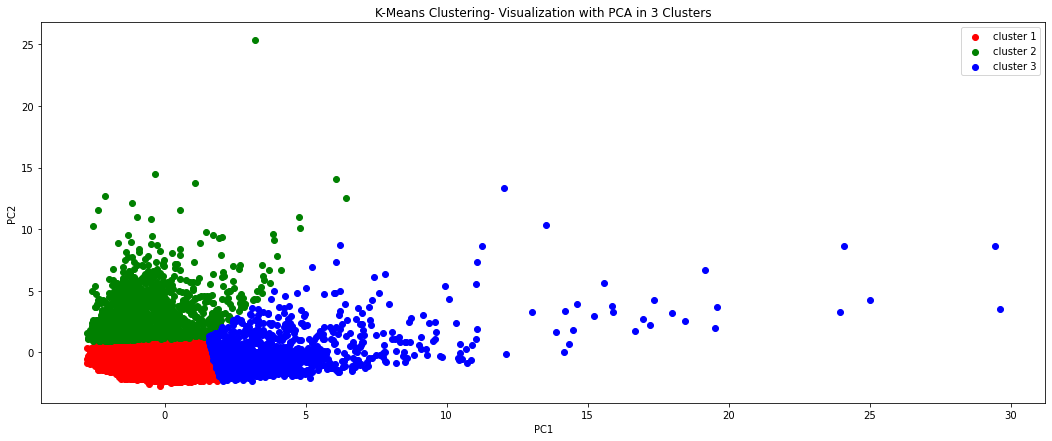

In [54]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 3, n_init=1000, max_iter=400, init='k-means++', random_state=42).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('K-Means Clustering- Visualization with PCA in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## (B). Clustering using Hierarchical Agglomerative Clustering

- 1. In this section, we will perform Agglomerative clustering on the standardized data with hyperparameter tuning

- 2. Check for the clustering metrics (silhouette scores)

- 3. Get a visualization with PCA for meaningful interpretation of results

## Hyperparameter Tuning

In [32]:
# Defining the agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


linkage_methods = ["ward", "average", "complete"]


print("For Cosine affinity value")
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method average: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method complete: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")



For Cosine affinity value
------------------------------------------------
Silhouette score of linkage method average: 0.15838954266287925
------------------------------------------------
Silhouette score of linkage method complete: 0.16936752492410517
------------------------------------------------


In [33]:
print("For Euclidean affinity value")
print("------------------------------------------------")



# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method average: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method ward: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method ward: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")

For Euclidean affinity value
------------------------------------------------
Silhouette score of linkage method ward: 0.1731098007232828
------------------------------------------------
Silhouette score of linkage method average: 0.8126023943418351
------------------------------------------------
Silhouette score of linkage method complete: 0.7863087686974487
------------------------------------------------


In [35]:
linkage_methods = ["ward", "average", "complete"]


print("For Manhattan affinity value")
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='manhattan',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method average: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='manhattan',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method complete: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")

For Manhattan affinity value
------------------------------------------------
Silhouette score of linkage method average: 0.8288276674797601
------------------------------------------------
Silhouette score of linkage method complete: 0.7559621820616353
------------------------------------------------


In [36]:
linkage_methods = ["ward", "average", "complete"]


print("For l2 affinity value")
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='l2',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method average: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='l2',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method complete: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")

For l2 affinity value
------------------------------------------------
Silhouette score of linkage method average: 0.8126023943418351
------------------------------------------------
Silhouette score of linkage method complete: 0.7863087686974487
------------------------------------------------


In [37]:
linkage_methods = ["ward", "average", "complete"]


print("For l1 affinity value")
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='l1',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method average: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")


# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='l1',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(data_imputed)

#print("ARI score of linkage method complete: {}".format(
#    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------")

For l1 affinity value
------------------------------------------------
Silhouette score of linkage method average: 0.8288276674797601
------------------------------------------------
Silhouette score of linkage method complete: 0.7559621820616353
------------------------------------------------


**The tuned hyperparameters for Agglomerative Clustering are**
- **n_clusters = 3**
- **affinity='euclidean'**
- **linkage="ward"**

**The silhouette score Agglomerative Clustering is 0.1731**

In [38]:
silhouette_scores_models.append(0.1731)
print(silhouette_scores_models)

[0.2509, 0.1731]


Text(0, 0.5, 'PC2')

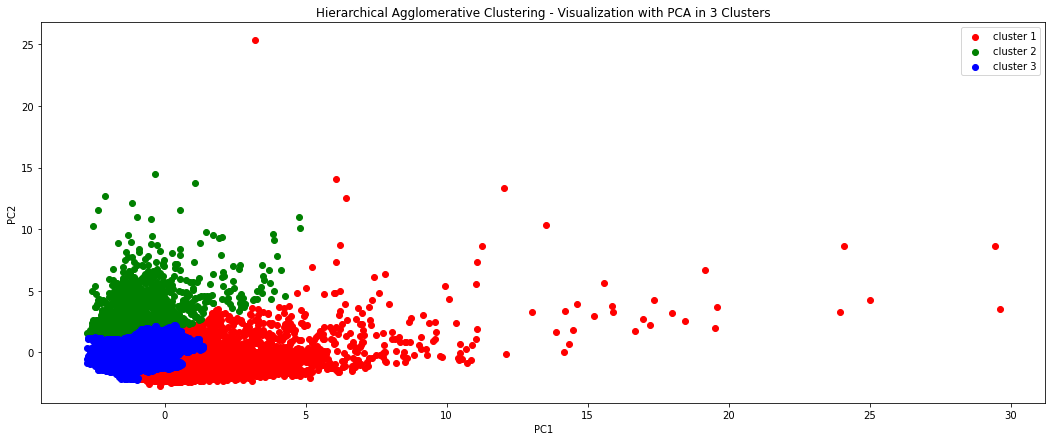

In [86]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('Hierarchical Agglomerative Clustering - Visualization with PCA in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

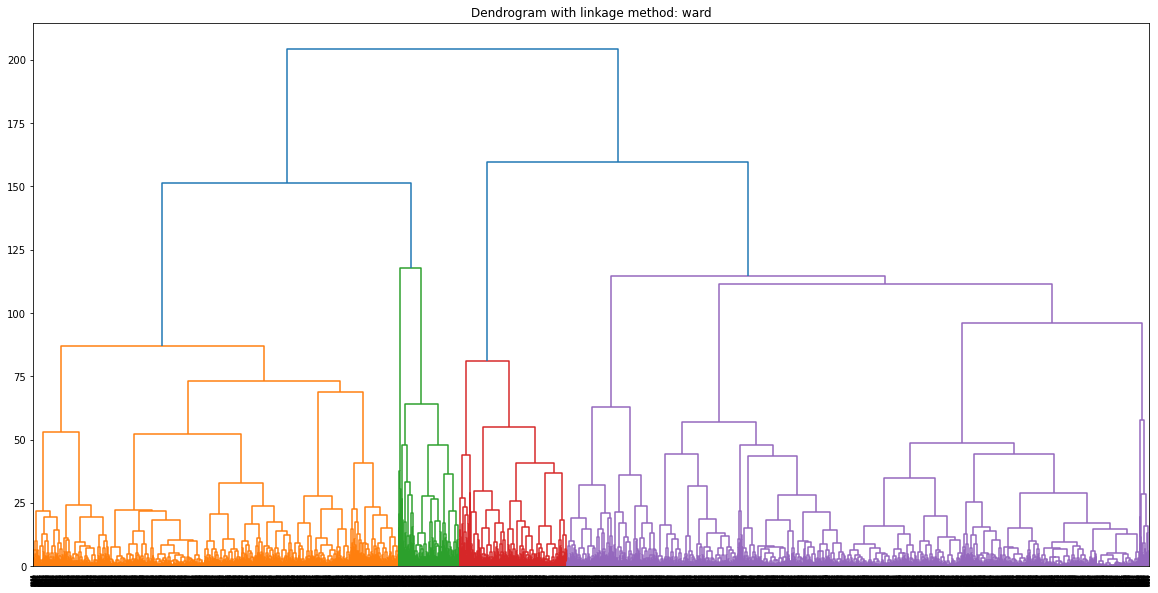

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(data_imputed, method='ward'))
plt.show()

## Visualization with PCA

Text(0, 0.5, 'PC2')

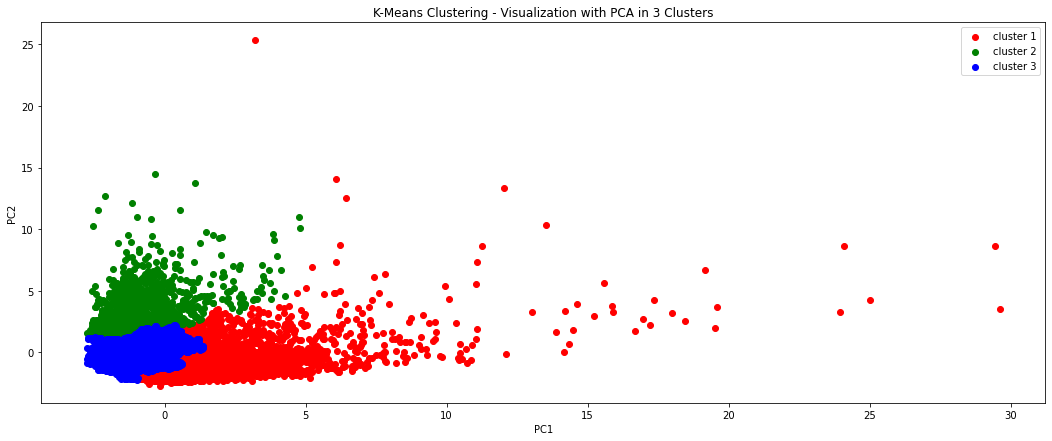

In [105]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('Hierarchical Agglomerative Clustering - Visualization with PCA in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

##  (C). Clustering using DBSCAN

- 1.In this section, we will perform DBSCAN on the standardized data hyperparameter tuning

- 2.Check for the clustering metrics (silhouette scores)

- 3.Get a visualization with PCA for meaningful interpretation of results 


In [35]:
from sklearn.cluster import DBSCAN
from sklearn import datasets, metrics
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(data_imputed)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=3, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(data_imputed)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))

Number of clusters when eps=1 is: 2599
Number of clusters when eps=0.01 is: 2
The silhouette score of the DBSCAN solution: 0.0632580243102693
Number of clusters when eps=0.1 is: 44
The silhouette score of the DBSCAN solution: -0.47603460134320114
Number of clusters when eps=1 is: 67
The silhouette score of the DBSCAN solution: -0.4198663399289666
Number of clusters when eps=2 is: 7
The silhouette score of the DBSCAN solution: 0.12899090447061923
Number of clusters when eps=3 is: 7
The silhouette score of the DBSCAN solution: 0.3959177469221821
Number of clusters when eps=4 is: 4
The silhouette score of the DBSCAN solution: 0.6239437244303323
Number of clusters when eps=5 is: 4
The silhouette score of the DBSCAN solution: 0.7077334984013299
Number of clusters when eps=6 is: 3
The silhouette score of the DBSCAN solution: 0.7823688319502432
Number of clusters when eps=7 is: 4
The silhouette score of the DBSCAN solution: 0.7811109798855764
Number of clusters when eps=8 is: 2
The silhouette

**The tuned hyperparameters for DBSCAN are**
- **eps=4**
- **metric="euclidean"**
- **min_samples=3**

**The silhouette score DBSCAN is 0.6239**

In [39]:
silhouette_scores_models.append(0.6239)
print(silhouette_scores_models)

[0.2509, 0.1731, 0.6239]


Text(0, 0.5, 'PC2')

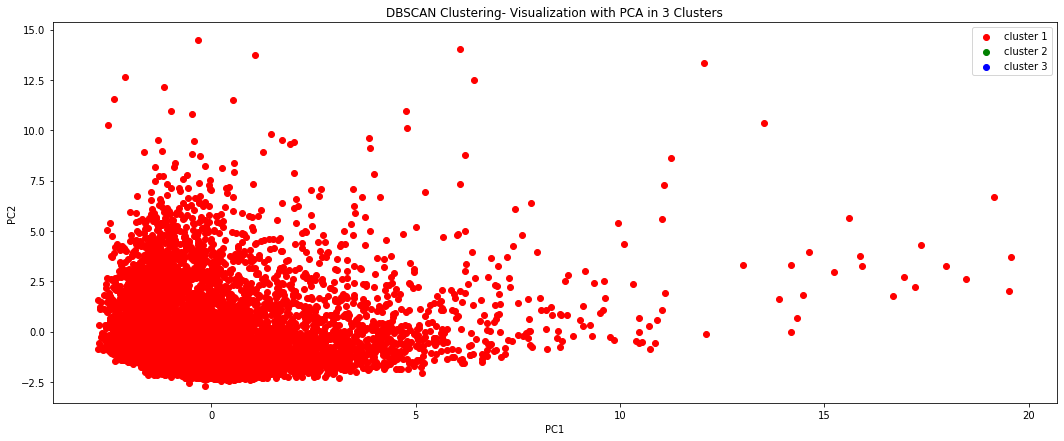

In [87]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(DBSCAN(eps=4, min_samples=3, metric="euclidean").fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('DBSCAN Clustering- Visualization with PCA in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## (D). Clustering using Gaussian Mixture Models

- 1.In this section, we will perform GMM on the standardized data hyperparameter tuning

- 2.Check for the clustering metrics (silhouette scores)

- 3.Get a visualization with PCA for meaningful interpretation of results 


In [177]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(data_imputed)

print("Silhouette score: {}".format(metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))

Silhouette score: 0.11131995340366764


In [178]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(data_imputed)

print("Silhouette score with covariance_type=full: {}".format(metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(data_imputed)

print("Silhouette score with covariance_type=tied: {}".format(metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(data_imputed)


print("Silhouette score with covariance_type=diag: {}".format(metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(data_imputed)

print("Silhouette score with covariance_type=spherical: {}".format(metrics.silhouette_score(data_imputed, clusters, metric='euclidean')))
print("------------------------------------------------------")


Silhouette score with covariance_type=full: 0.11131995340366764
------------------------------------------------------
Silhouette score with covariance_type=tied: 0.16568254723264053
------------------------------------------------------
Silhouette score with covariance_type=diag: 0.0897165183002172
------------------------------------------------------
Silhouette score with covariance_type=spherical: 0.08767947716625071
------------------------------------------------------


**The tuned hyperparameters for Gaussian Mixture Models are**
- **n_clusters = 3**
- **affinity='euclidean'**
- **linkage="ward"**

**The silhouette score Gaussian Mixture Models is 0.1657**

In [40]:
silhouette_scores_models.append(0.1657)
print(silhouette_scores_models)

[0.2509, 0.1731, 0.6239, 0.1657]


## Visualization with PCA

Text(0, 0.5, 'PC2')

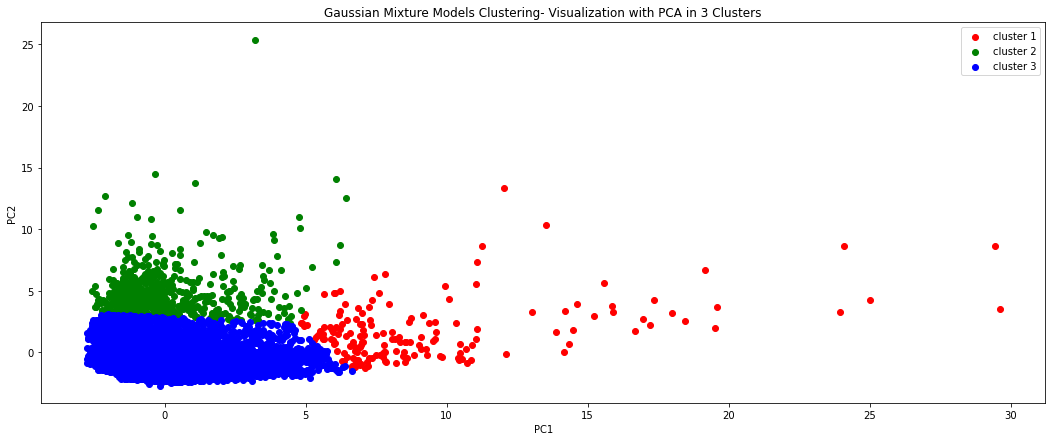

In [88]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components=3, random_state=123, covariance_type="tied").fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('Gaussian Mixture Models Clustering- Visualization with PCA in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## 8. Model Selection
 - Silhouette Scores
 - Dimensionality reduction with PCA for visualization

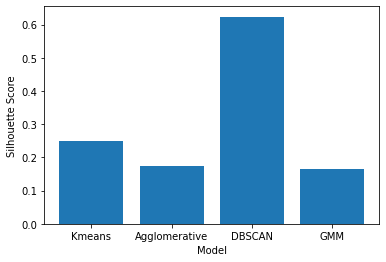

In [43]:
k = ['Kmeans', 'Agglomerative', 'DBSCAN', 'GMM'] 
plt.bar(k, silhouette_scores_models) 
plt.xlabel('Model', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

**Although, DBSCAN has the highest silhouette score, a visualization of the dimensionality reduced clusters as shown below tells us that there is no ditinction between clusters and most of the values are clustered as noise.**

Text(0, 0.5, 'PC2')

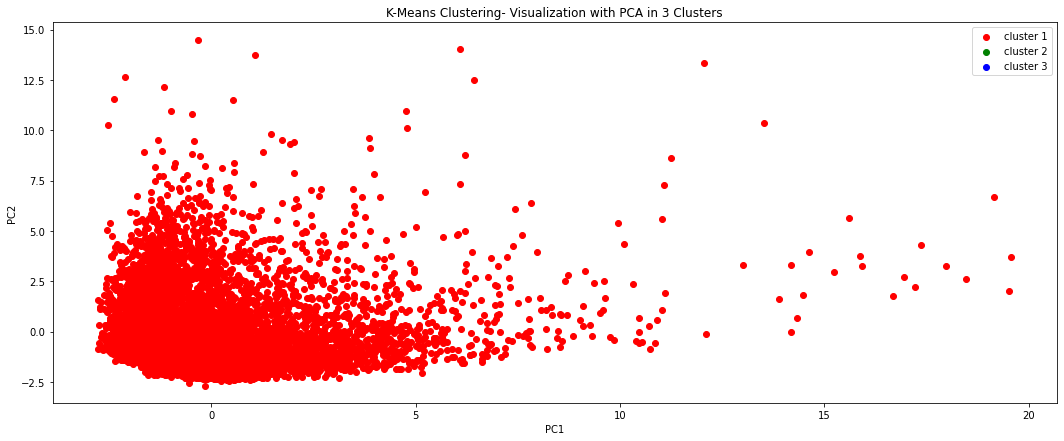

In [44]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(DBSCAN(eps=4, min_samples=3, metric="euclidean").fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('K-Means Clustering- Visualization with PCA in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## So, KMeans is the model chosen.

## 9. Interpretation of clusters for KMeans

In [46]:
kmeans_final = KMeans(n_clusters = 3, n_init=1000, max_iter=400, init='k-means++', random_state=42)
kmeans_final.fit(data_imputed)
clusters =  kmeans_final.predict(data_imputed)
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(data_imputed, index=raw_df.index, columns=raw_df.columns)
clusters =  kmeans_final.predict(data_imputed)
X_clustered["cluster"] = clusters

cluster
0   -0.178132
1   -0.545589
2    0.925515
Name: BALANCE, dtype: float64


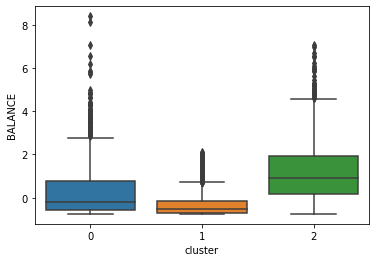

In [77]:
import seaborn as sns
from scipy.stats.mstats import winsorize

var_list=['BALANCE','BALANCE_FREQUENCY','PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE','CREDIT_LIMIT','MINIMUM_PAYMENTS']

box_plot = sns.boxplot(y="BALANCE",x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['BALANCE'].median()
print(medians)

cluster
0    0.518084
1    0.518084
2    0.518084
Name: BALANCE_FREQUENCY, dtype: float64


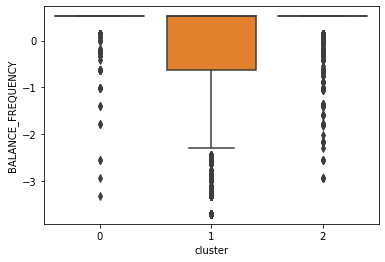

In [83]:
# sns.boxplot(y=winsorize(X_clustered["BALANCE_FREQUENCY"], (0.1, 0.0)), x="cluster", data=X_clustered);

box_plot = sns.boxplot(y="BALANCE_FREQUENCY", x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['BALANCE_FREQUENCY'].median()
print(medians)

cluster
0    0.983080
1   -0.328832
2   -0.469552
Name: PURCHASES, dtype: float64


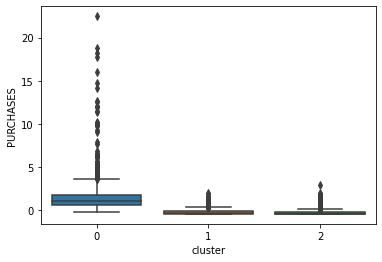

In [78]:
#sns.boxplot(y="PURCHASES", x="cluster", data=X_clustered);

box_plot = sns.boxplot(y="PURCHASES", x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['PURCHASES'].median()
print(medians)

cluster
0    1.269843
1   -0.183590
2   -1.221758
Name: PURCHASES_FREQUENCY, dtype: float64


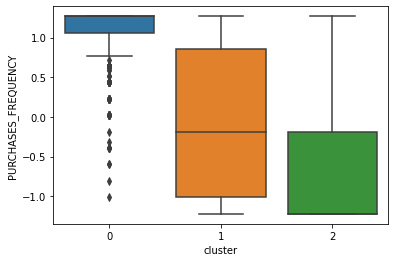

In [79]:
#sns.boxplot(y="PURCHASES_FREQUENCY", x="cluster", data=X_clustered);
box_plot = sns.boxplot(y="PURCHASES_FREQUENCY", x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['PURCHASES_FREQUENCY'].median()
print(medians)

cluster
0   -0.466786
1   -0.466786
2    1.021066
Name: CASH_ADVANCE, dtype: float64


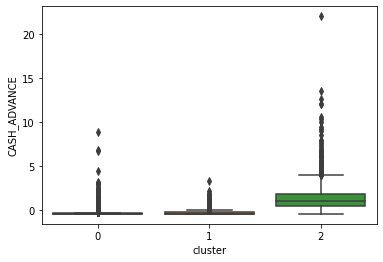

In [80]:
#sns.boxplot(y="CASH_ADVANCE", x="cluster", data=X_clustered);
box_plot = sns.boxplot(y="CASH_ADVANCE", x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['CASH_ADVANCE'].median()
print(medians)

cluster
0    0.688639
1   -0.548165
2    0.413794
Name: CREDIT_LIMIT, dtype: float64


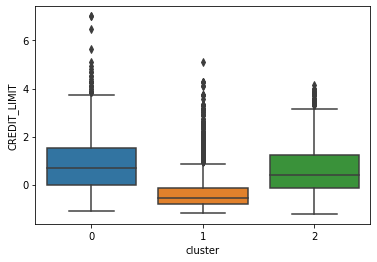

In [81]:
#sns.boxplot(y="CREDIT_LIMIT", x="cluster", data=X_clustered);
box_plot = sns.boxplot(y="CREDIT_LIMIT", x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['CREDIT_LIMIT'].median()
print(medians)

cluster
0   -0.205626
1   -0.272402
2    0.098218
Name: MINIMUM_PAYMENTS, dtype: float64


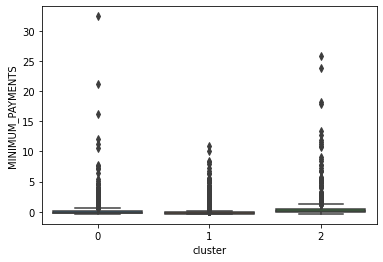

In [84]:
#sns.boxplot(y="MINIMUM_PAYMENTS", x="cluster", data=X_clustered);
box_plot = sns.boxplot(y="MINIMUM_PAYMENTS", x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['MINIMUM_PAYMENTS'].median()
print(medians)

cluster
0    0.343036
1   -0.401919
2   -0.029672
Name: PAYMENTS, dtype: float64


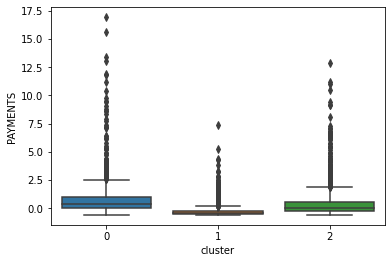

In [85]:
box_plot = sns.boxplot(y="PAYMENTS", x="cluster", data=X_clustered)
medians = X_clustered.groupby(['cluster'])['PAYMENTS'].median()
print(medians)

## Cluster Analysis

**cluster 0**

- 1. BALANCE	           low 
- 2. BALANCE_FREQUENCY	   med 
- 3. PURCHASES	           high 
- 4. PURCHASES_FREQUENCY   high 
- 5. CASH_ADVANCE	       low
- 6. MINIMUM_PAYMENTS	   low
- 7. CREDIT_LIMIT	       high 
- 8. PAYMENTS	           high 

**Label --------------- Active User**

# CLUSTER 0: Active User
This customer group indicates a group of customers who have **high credit limit**, **high purchase and purchase frequency** with the **low minimum payments** but **low balance**.  This is the cluster marketing team should focus on as they are ideal group!

	
**cluster 1**

- 1. BALANCE	           med 
- 2. BALANCE_FREQUENCY	   med
- 3. PURCHASES	           low
- 4. PURCHASES_FREQUENCY   med
- 5. CASH_ADVANCE	       low
- 6. MINIMUM_PAYMENTS	   low
- 7. CREDIT_LIMIT	       low
- 8. PAYMENTS	           low 
	
**Label ---------------  Cautious Spender**

## CLUSTER 1: Cautious Spender
This customer group indicates a group of customers who have **medium balances and low cash advances**, **low purchases**  with **lowest credit limit.** 
 
	
**cluster 2**

- 1. BALANCE	           high
- 2. BALANCE_FREQUENCY	   med
- 3. PURCHASES	           low
- 4. PURCHASES_FREQUENCY   low
- 5. CASH_ADVANCE	       high
- 6. MINIMUM_PAYMENTS	   med
- 7. CREDIT_LIMIT	       high
- 8. PAYMENTS	           med

**Label ---------------  Average Joe**	

## CLUSTER 2:Average Joe
This customer group indicates a group of customers who have **high balances and medium cash payments, low purchase, high credit limit.** For this cluster marketing team should focus on some strategy to make them spend money!

## PCA Visualization of all 3 clusters

Text(0, 0.5, 'PC2')

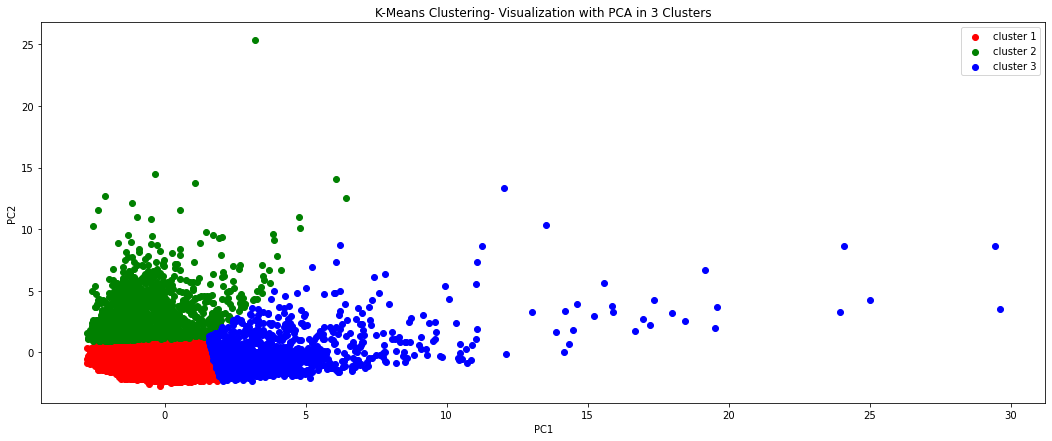

In [56]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 3, n_init=1000, max_iter=400, init='k-means++', random_state=42).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('K-Means Clustering- Visualization with PCA in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## TSNE Visualization of all 3 clusters

Text(0, 0.5, 'PC2')

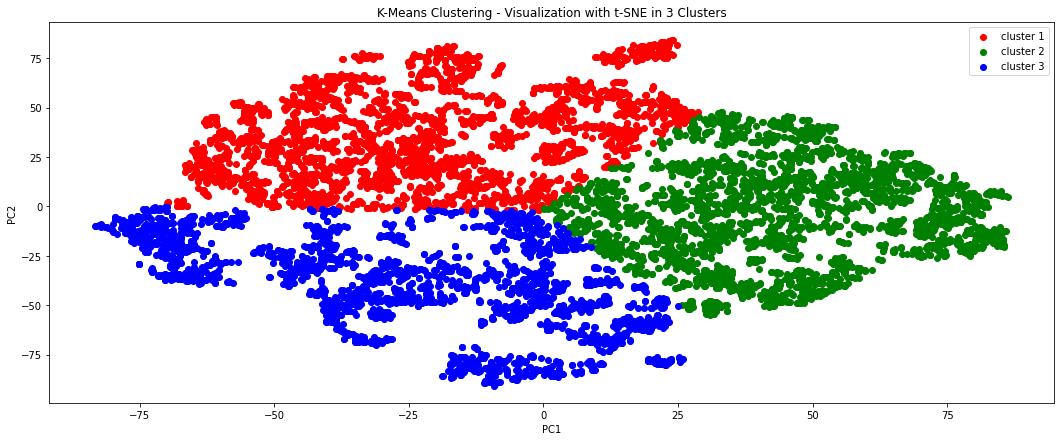

In [57]:
from sklearn.manifold import TSNE
import umap

data_t = pd.DataFrame(TSNE(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 3, n_init=1000, max_iter=400, init='k-means++', random_state=42).fit_predict(data_t))
data_t = pd.concat([data_t, preds], axis =1)
data_t.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_t[data_t['target']==0].iloc[:,0], data_t[data_t.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_t[data_t['target']==1].iloc[:,0], data_t[data_t.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_t[data_t['target']==2].iloc[:,0], data_t[data_t.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('K-Means Clustering - Visualization with t-SNE in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## UMAP Visualization of all 3 clusters

Text(0, 0.5, 'PC2')

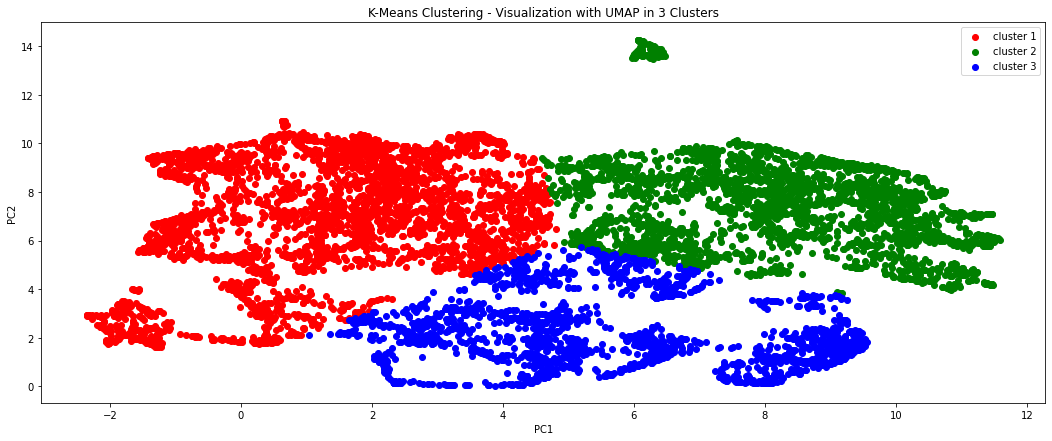

In [97]:
import umap
from sklearn.manifold import TSNE

data_u = pd.DataFrame(umap.UMAP(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 3, n_init=1000, max_iter=400, init='k-means++', random_state=42).fit_predict(data_u))
data_u = pd.concat([data_u, preds], axis =1)
data_u.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue']
plt.scatter(data_u[data_u['target']==0].iloc[:,0], data_u[data_u.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_u[data_u['target']==1].iloc[:,0], data_u[data_u.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_u[data_u['target']==2].iloc[:,0], data_u[data_u.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('K-Means Clustering - Visualization with UMAP in 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## 10. Conclusions

- **Summary and Possible Marketing Strategy**

In this dataset we have segmented the customers into three smaller groups: **the Active Users**, **the Cautious Spenders**, and **the Average Joe**. To conclude this cluster analysis, let's summerize up what we have learned:

- The **Average Joe** has healthy finances and low debts. While encouraging these people to use credit cards more is necessary for the company's profit, business ethics and social responsibility should also be considered.

- The **Active User** is the group, marketing team should focus on as they are ideal group.

- The **Cautious Spenders** is the difficult to strategize but should not be neglected




- **Conclusions**

In this project, we have performed data preprocessing, feature extraction with PCA, looked at various clustering metrics (inertias, silhouette scores), experimented with various Clustering algorithms (KMeans Clustering, Agglomerative Hierarchical Clustering, DBSCAN Clustering, and Gaussian Mixture Clustering), data visualizations.